### More Regression with Python

In [1]:
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
survey = fetch_openml(data_id = 534, as_frame=True)

In [4]:
survey.data.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married


In [5]:
survey.target

0       5.10
1       4.95
2       6.67
3       4.00
4       7.50
       ...  
529    11.36
530     6.10
531    23.25
532    19.88
533    15.38
Name: WAGE, Length: 534, dtype: float64

In [6]:
import pandas as pd

In [7]:
X = pd.get_dummies(survey.data, drop_first=True)

In [8]:
y = survey.target

In [9]:
lr = LinearRegression()
ridge = Ridge()

In [10]:
lr.fit(X, y)

LinearRegression()

In [11]:
ridge.fit(X, y)

Ridge()

In [12]:
lr.score(X, y)

0.32649082803385054

In [13]:
ridge.score(X, y)

0.3264529015522104

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sscaler = StandardScaler()
sscaler.fit(X)

StandardScaler()

In [16]:
Xt = sscaler.transform(X)

In [17]:
ridge.fit(Xt, y)

Ridge()

In [18]:
ridge.score(Xt, y)

0.3264423948108295

In [19]:
from ipywidgets import interact
import ipywidgets as widgets

In [20]:
def ridge_experiment(alpha):
    ridge = Ridge(alpha)
    ridge.fit(Xt, y)
    return ridge.score(Xt, y)

In [21]:
interact(ridge_experiment, alpha = widgets.FloatLogSlider(min = 0.0001, max = 10.0, step = 0.1))

interactive(children=(FloatLogSlider(value=1.0002302850208247, description='alpha', max=10.0, min=0.0001), Out…

<function __main__.ridge_experiment(alpha)>

In [22]:
X.head()

,EDUCATION,EXPERIENCE,AGE,SOUTH_yes,SEX_male,UNION_not_member,RACE_Other,RACE_White,OCCUPATION_Management,OCCUPATION_Other,OCCUPATION_Professional,OCCUPATION_Sales,OCCUPATION_Service,SECTOR_Manufacturing,SECTOR_Other,MARR_Unmarried
0,8.0,21.0,35.0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,9.0,42.0,57.0,0,0,1,0,1,0,1,0,0,0,1,0,0
2,12.0,1.0,19.0,0,1,1,0,1,0,1,0,0,0,1,0,1
3,12.0,4.0,22.0,0,1,1,0,1,0,1,0,0,0,0,1,1
4,12.0,17.0,35.0,0,1,1,0,1,0,1,0,0,0,0,1,0


In [23]:
Xcopy = X.copy()
toplot = Xcopy.insert(0, "WAGE", y)

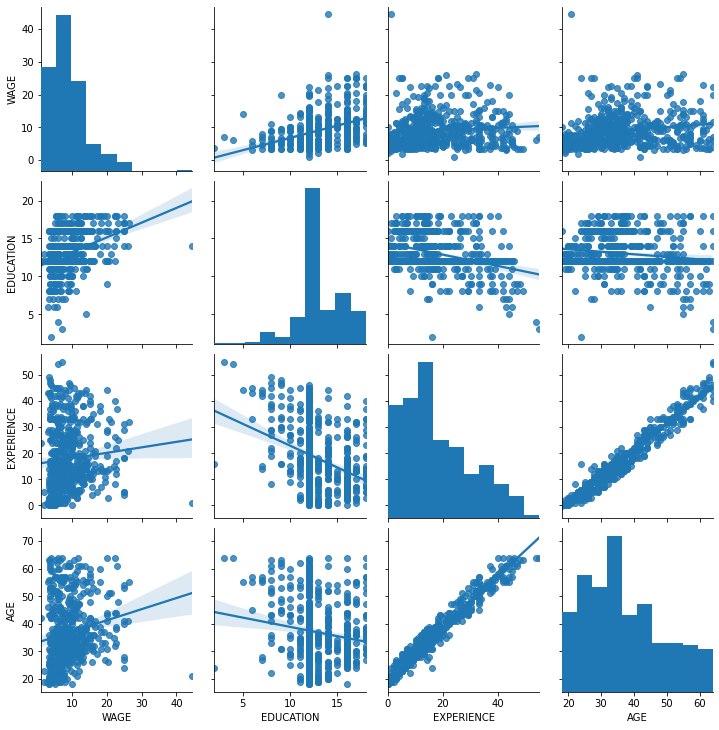

In [27]:
import seaborn as sns
sns.pairplot(Xcopy.iloc[:, :4], kind = 'reg')

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

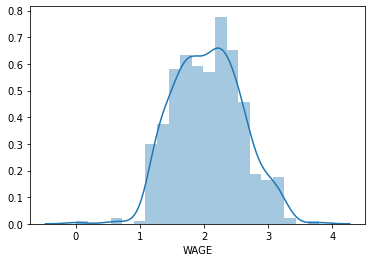

In [33]:
import numpy as np
sns.distplot(np.log(y))

In [34]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [39]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print('Train: ', lr.score(X_train_scaled, y_train))
print('Test: ', lr.score(X_test_scaled, y_test))

Train:  0.4062932149762779
Test:  0.21698038697070843


In [43]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train_scaled, y_train)
print('Train: ', ridge.score(X_train_scaled, y_train))
print('Test: ', ridge.score(X_test_scaled, y_test))

Train:  0.40611726300689377
Test:  0.22158100476265075


In [44]:
ridge.coef_

array([ 0.16340904,  0.04469491,  0.08309129, -0.04994757,  0.11449828,
       -0.09026566, -0.00106281,  0.0364239 ,  0.07394384, -0.02960304,
        0.04785344, -0.0404524 , -0.06361239, -0.00045984, -0.04341718,
       -0.03251188])

In [45]:
X.columns

Index(['EDUCATION', 'EXPERIENCE', 'AGE', 'SOUTH_yes', 'SEX_male',
       'UNION_not_member', 'RACE_Other', 'RACE_White', 'OCCUPATION_Management',
       'OCCUPATION_Other', 'OCCUPATION_Professional', 'OCCUPATION_Sales',
       'OCCUPATION_Service', 'SECTOR_Manufacturing', 'SECTOR_Other',
       'MARR_Unmarried'],
      dtype='object')

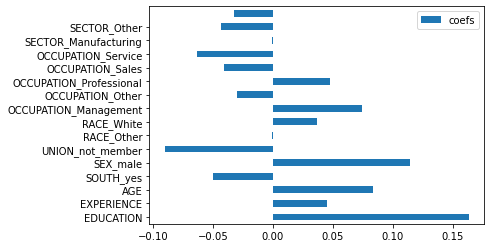

In [50]:
import matplotlib.pyplot as plt
pd.DataFrame({'features': X.columns, 'coefs': ridge.coef_}).plot(kind = 'barh')
plt.yticks(range(15), X.columns);